In [2]:
# import kagglehub
# import os
# import shutil

# # Define the path where you want to download the dataset
# desired_path = "C:/repos/ECDS-NeuralNets/Day 1/Dataset"

# # Check if the directory exists, if not create it
# if not os.path.exists(desired_path):
#     os.makedirs(desired_path)

# # Download latest version (it will download to the default location)
# default_path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

# # Move the downloaded files to your desired directory
# shutil.move(default_path, desired_path)

# print(desired_path)

In [3]:
# Let's check and see the data
import pandas as pd
data = pd.read_csv(r'C:\repos\ECDS-NeuralNets\Day 1\Dataset\1\diabetes_prediction_dataset.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
dupes = data[data.duplicated()]
dupes_sum = data.duplicated().sum()  # Check for duplicates
#df.drop_duplicates(inplace=True)  # Remove duplicates
print("duplicated rows:", dupes)

duplicated rows:        gender   age  hypertension  heart_disease smoking_history    bmi  \
2756     Male  80.0             0              0         No Info  27.32   
3272   Female  80.0             0              0         No Info  27.32   
3418   Female  19.0             0              0         No Info  27.32   
3939   Female  78.0             1              0          former  27.32   
3960     Male  47.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756           6.6            

diabetes
0    91500
1     8500
Name: count, dtype: int64


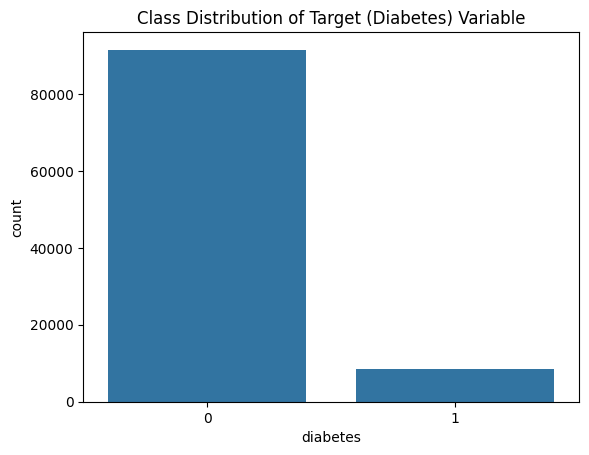

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
print(data['diabetes'].value_counts())
# Visualize the distribution of the target variable
sns.countplot(x='diabetes', data=data)
plt.title('Class Distribution of Target (Diabetes) Variable')
plt.show()

In [8]:
# Filter the dataset for rows where the target is equal to a specific value (e.g., 1)
target_value = 1
subset = data[data['diabetes'] == target_value]

# Check for duplicates in the subset
duplicates_in_target_value = subset[subset.duplicated(keep=False)]

# Display duplicates
print("Dupes Counter with Target Variable = 1:", len(duplicates_in_target_value))
print(f"Duplicates for target value {target_value}:")
duplicates_in_target_value


Dupes Counter with Target Variable = 1: 35
Duplicates for target value 1:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
922,Female,53.0,0,0,never,27.32,6.6,155,1
5255,Female,53.0,0,0,never,27.32,9.0,160,1
16321,Male,38.0,0,0,No Info,31.85,5.7,220,1
20738,Female,80.0,0,0,never,27.32,8.2,280,1
24175,Male,60.0,0,0,never,27.32,6.5,300,1
24712,Female,80.0,0,0,No Info,27.32,6.5,280,1
25295,Male,38.0,0,0,No Info,31.85,5.7,220,1
25712,Female,80.0,0,0,No Info,27.32,9.0,220,1
26009,Female,80.0,0,0,No Info,27.32,6.5,240,1
30255,Female,80.0,1,0,No Info,27.32,7.5,160,1


In [9]:
# inplace=True: Makes the change directly in the original DataFrame without needing to reassign it.
data_deduped = data.drop_duplicates(inplace=True)
print(data.duplicated().sum())
data[data.duplicated()]

0


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


diabetes
0    87664
1     8482
Name: count, dtype: int64


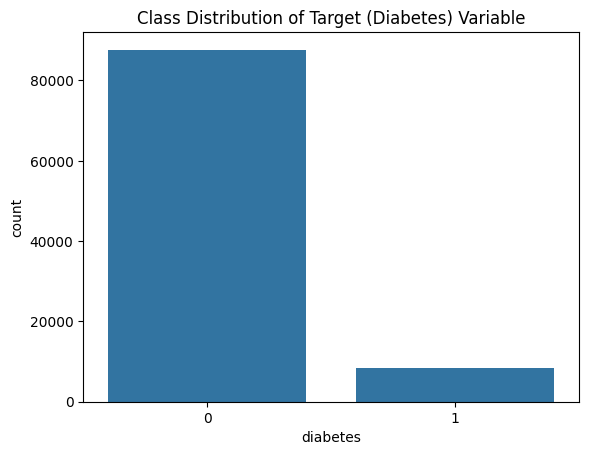

In [10]:
# Now let's check again the distribution after deduplication
print(data['diabetes'].value_counts())
# Visualize the distribution of the target variable
sns.countplot(x='diabetes', data=data)
plt.title('Class Distribution of Target (Diabetes) Variable')
plt.show()

### We can see that after deduplication, still the second class of the target variable is largely imbalanced from the other one. We are dealing with extreme class imbalance.

In [11]:
# Let's conduct an undersampling method to balance out our data
from imblearn.under_sampling import RandomUnderSampler
X = data.drop('diabetes', axis=1)
y = data['diabetes']
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

diabetes
0    8482
1    8482
Name: count, dtype: int64


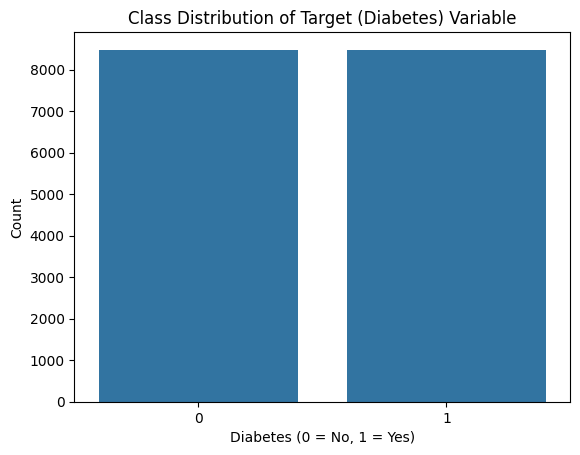

In [12]:
# Check the distribution of the resampled target variable
print(y_resampled.value_counts())

# Visualize the distribution of the resampled target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_resampled)
plt.title('Class Distribution of Target (Diabetes) Variable')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


### **Advantages of Undersampling:**
Simplicity:<br>It’s easy to implement and understand.
Reduced Overfitting:<br>No synthetic data means less risk of overfitting to artificial patterns.
Lower Computational Cost:<br>Smaller datasets mean faster training.
### **Potential Drawbacks:**
Loss of Information:<br>You discard a significant amount of the majority class data, which could result in losing valuable patterns.
Less Effective for Complex Data:<br>If the majority class has complex structure, undersampling may miss important nuances.
### **When Undersampling is a Good Choice:**
Large Majority Class:<br>If you have a massive majority class, removing data is feasible.
Fast Prototyping:<br>Useful when you want quick results without complex tuning.
Balanced Complexity:<br>Works well when the minority class is distinct and well-separated.


In [13]:
# Concatenate the resampled features and target variable to form a new dataframe
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Check the first few rows of the resampled data
data_resampled

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
50567,Male,10.0,0,0,No Info,16.83,4.0,155,0
7623,Female,3.0,0,0,No Info,27.32,3.5,126,0
49768,Female,42.0,0,0,never,24.69,5.0,140,0
13069,Female,70.0,0,0,never,27.32,4.5,159,0
62524,Female,20.0,0,0,never,18.51,4.8,80,0
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


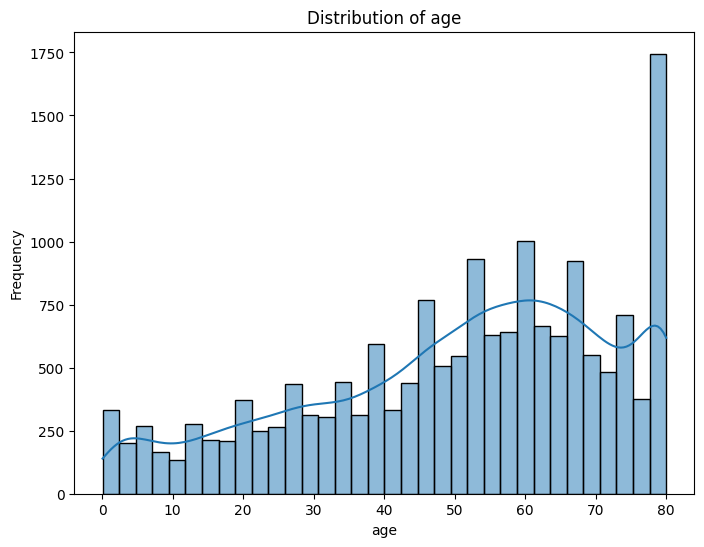

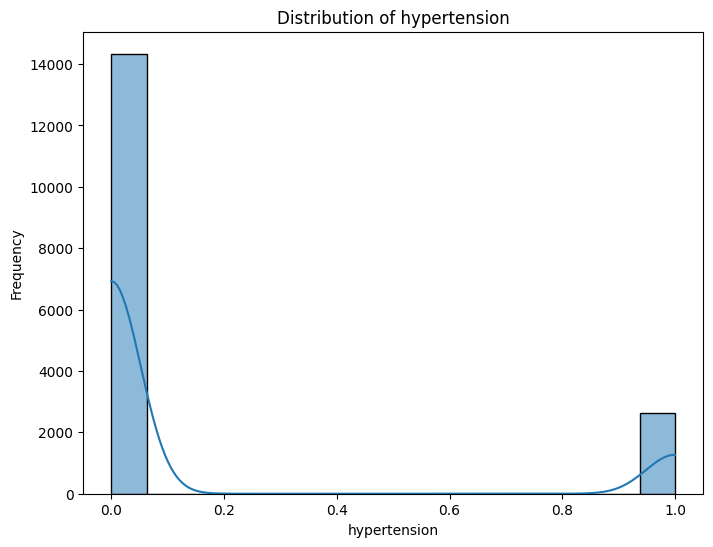

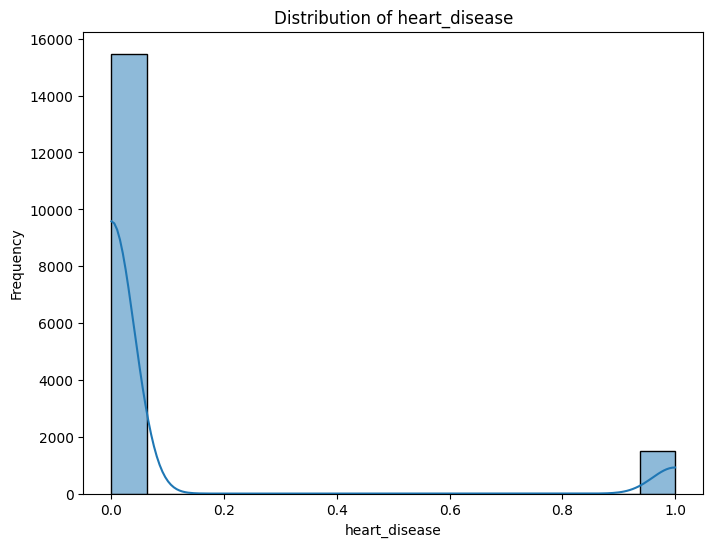

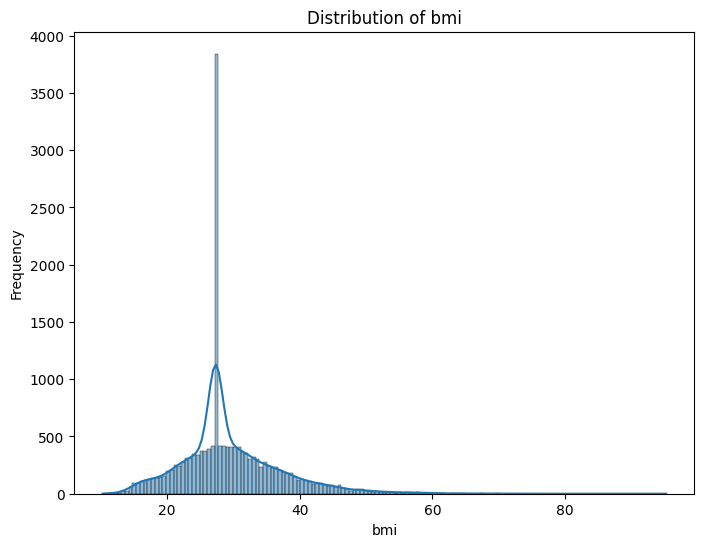

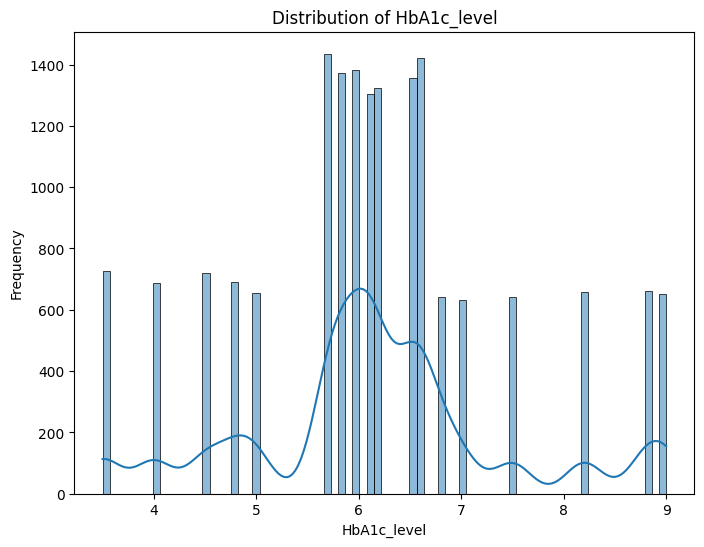

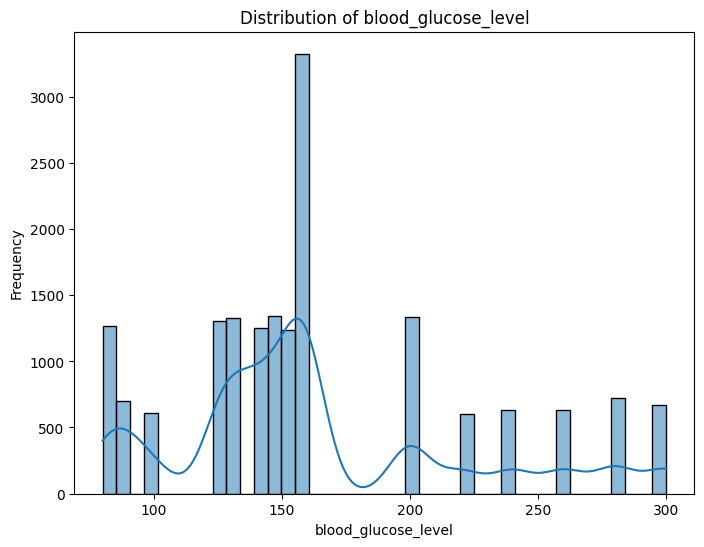

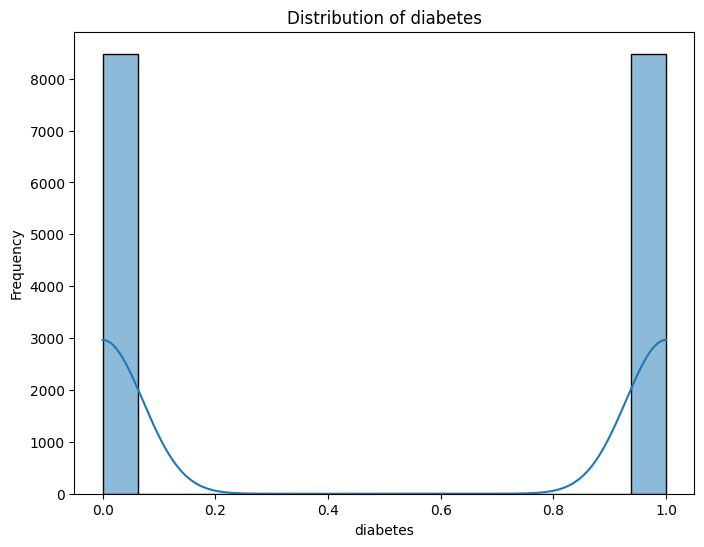

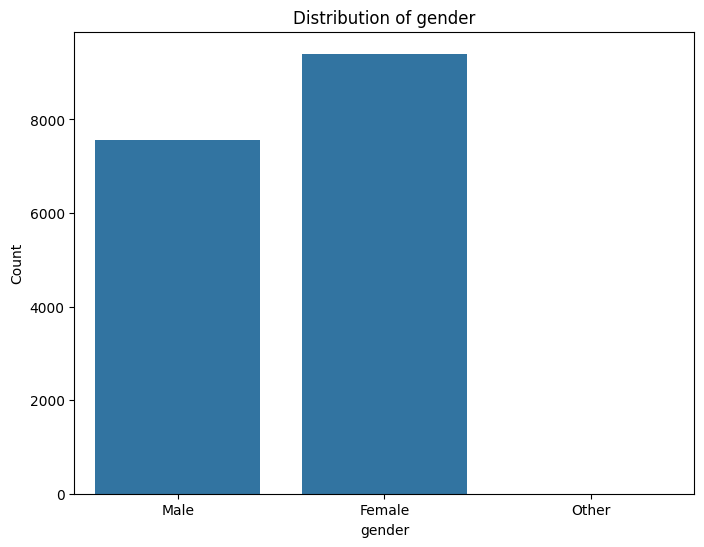

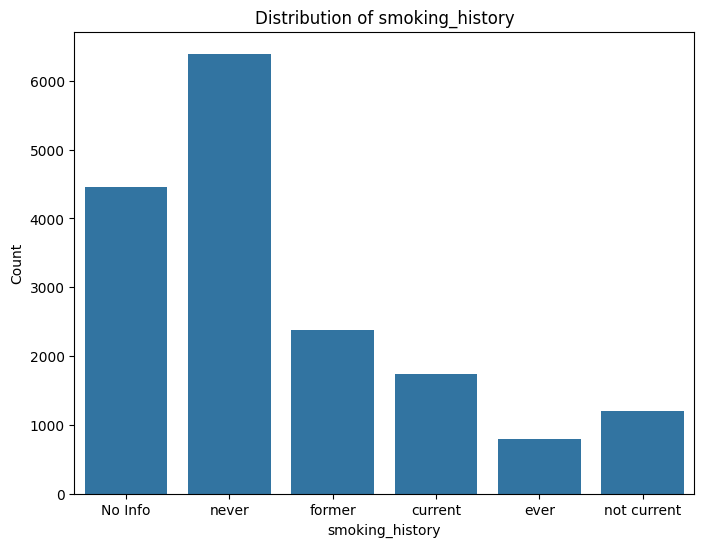

In [14]:
# Identify categorical columns in the resampled data
categorical_cols = data_resampled.select_dtypes(include=['object', 'category']).columns

# Visualize distribution of numerical columns (using histplot)
numerical_cols = data_resampled.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_resampled[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize distribution of categorical columns (using countplot)
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=data_resampled[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [15]:
print(data_resampled[data_resampled['gender'] == 'other']['gender'].nunique())
print(data_resampled['gender'].unique())
print(data_resampled['smoking_history'].unique())

0
['Male' 'Female' 'Other']
['No Info' 'never' 'former' 'current' 'ever' 'not current']


# Types of Encoding in Machine Learning

Encoding categorical variables is a crucial step in preparing data for machine learning models. Below are the most common encoding techniques, when to use them, and how they can benefit models, especially in cases with non-normally distributed data.

## 1. **Label Encoding**
- **Description**: Converts each unique category in a column into a numerical label (integer). For example, a column with categories like `['Male', 'Female', 'Other']` could be encoded as `[0, 1, 2]`.
- **When to Use**:
  - Works well for ordinal data (categories with a meaningful order).
  - Use when the model can interpret categorical variables as ordered.
- **Best for**:
  - Decision trees, random forests, and gradient boosting models.
  - Ordinal variables (e.g., `low`, `medium`, `high`).
- **Benefit for Non-Normally Distributed Data**:
  - Label encoding doesn’t distort the relationships between categories by converting them into integers, making it more appropriate for some non-normally distributed datasets where the range and relationships are meaningful.

## 2. **One-Hot Encoding**
- **Description**: Creates a binary column for each category in the original variable. Each row has a `1` in the column corresponding to its category, and `0` in others.
  - Example: If you have the categories `['Male', 'Female', 'Other']`, one-hot encoding will create three columns: `Male`, `Female`, `Other`, where each row has one `1` and the rest are `0`.
- **When to Use**:
  - Best for nominal data (categories without any inherent order).
  - Useful when the categories do not have a natural ranking.
- **Best for**:
  - Linear models, neural networks, and algorithms that can interpret binary features (e.g., logistic regression, support vector machines, etc.).
  - Avoid multicollinearity by using the `drop_first=True` option.
- **Benefit for Non-Normally Distributed Data**:
  - One-hot encoding is particularly effective for categorical variables in datasets that are not normally distributed. By transforming each category into a separate binary feature, it allows models to learn from each distinct category without assuming any numerical relationship, which is crucial in the absence of normal distribution.

## 3. **Ordinal Encoding**
- **Description**: Similar to label encoding, but specifically used for ordinal data where there is a natural order (e.g., `low`, `medium`, `high`).
- **When to Use**:
  - When categories have an inherent order.
  - Avoids the risk of treating categories as unrelated as with one-hot encoding.
- **Best for**:
  - Decision trees and models that can handle ordinal relationships.
  - Models where the order of categories has meaning.
- **Benefit for Non-Normally Distributed Data**:
  - Ordinal encoding respects the natural order of data and does not assume the data follows any normal distribution. This is beneficial in datasets with skewed or non-normal distributions, where the relationship between categories and the target is more important than distributional assumptions.

## 4. **Binary Encoding**
- **Description**: Combines the benefits of both label encoding and one-hot encoding. It converts categories into binary digits. This method is more compact and efficient than one-hot encoding.
- **When to Use**:
  - When there are a large number of categories, and one-hot encoding would lead to too many columns (high cardinality).
  - Suitable when reducing dimensionality is necessary.
- **Best for**:
  - High-cardinality categorical features, such as product IDs, zip codes, etc.
  - Algorithms like XGBoost and LightGBM, which can handle the binary features effectively.
- **Benefit for Non-Normally Distributed Data**:
  - For datasets with high cardinality and skewed distributions, binary encoding reduces the number of features while retaining the categorical information. This helps models avoid overfitting to noise in non-normally distributed data.

## 5. **Target Encoding (Mean Encoding)**
- **Description**: Encodes categories based on the mean of the target variable. For each category, the mean of the target variable is computed and assigned as the encoding for that category.
- **When to Use**:
  - When dealing with high-cardinality categorical features.
  - Useful when there is a strong relationship between the categorical feature and the target.
- **Best for**:
  - Tree-based models (XGBoost, LightGBM).
  - When working with high-cardinality features and relationships between categorical variables and the target.
- **Benefit for Non-Normally Distributed Data**:
  - Target encoding can capture trends and patterns in the categorical data that are related to the target variable, making it especially beneficial for non-normally distributed data where the relationships between categorical features and the target are more predictive than the distribution itself.

## 6. **Frequency Encoding**
- **Description**: Replaces each category with the frequency (count) of that category in the dataset.
- **When to Use**:
  - When there is a high cardinality of categorical features.
  - Helpful when the frequency of a category impacts the target variable.
- **Best for**:
  - Random forests, gradient boosting models, and other tree-based models.
  - Large datasets with many rare categories.
- **Benefit for Non-Normally Distributed Data**:
  - Frequency encoding is useful when the frequency of categories can be an important predictor. This method avoids making assumptions about the data’s distribution and directly uses category prevalence to influence the model’s prediction, which is beneficial for datasets with skewed distributions.

## Choosing the Best Encoding Method

- **For Ordinal Data**: Use **Label Encoding** or **Ordinal Encoding** since there is an inherent order to the categories.
- **For Nominal Data with Few Categories**: Use **One-Hot Encoding** as it is straightforward and widely accepted in most models.
- **For High Cardinality Data**: Use **Binary Encoding** or **Frequency Encoding** to reduce dimensionality and prevent the curse of dimensionality.
- **For High Cardinality with Strong Target Relationships**: Use **Target Encoding** when there is a strong correlation between categorical values and the target variable.
- **For Non-Normally Distributed Data**: Encoding methods like **Target Encoding**, **Binary Encoding**, and **Frequency Encoding** can be particularly effective, as they focus on the actual relationships and frequencies rather than assuming normality in the data.


In [16]:
# One-Hot Encoding for both 'gender' and 'smoking_history'
data = pd.get_dummies(data_resampled, columns=['gender', 'smoking_history'], drop_first=True)

In [17]:
data.dtypes

age                            float64
hypertension                     int64
heart_disease                    int64
bmi                            float64
HbA1c_level                    float64
blood_glucose_level              int64
diabetes                         int64
gender_Male                       bool
gender_Other                      bool
smoking_history_current           bool
smoking_history_ever              bool
smoking_history_former            bool
smoking_history_never             bool
smoking_history_not current       bool
dtype: object

In [18]:
# Convert any boolean columns to integers (True = 1, False = 0)
boolean_columns = data.select_dtypes(include=['bool']).columns
for col in boolean_columns:
    data[col] = data[col].astype(int)
# Check the result to see if it properly encoded the columns
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
50567,10.0,0,0,16.83,4.0,155,0,1,0,0,0,0,0,0
7623,3.0,0,0,27.32,3.5,126,0,0,0,0,0,0,0,0
49768,42.0,0,0,24.69,5.0,140,0,0,0,0,0,0,1,0
13069,70.0,0,0,27.32,4.5,159,0,0,0,0,0,0,1,0
62524,20.0,0,0,18.51,4.8,80,0,0,0,0,0,0,1,0


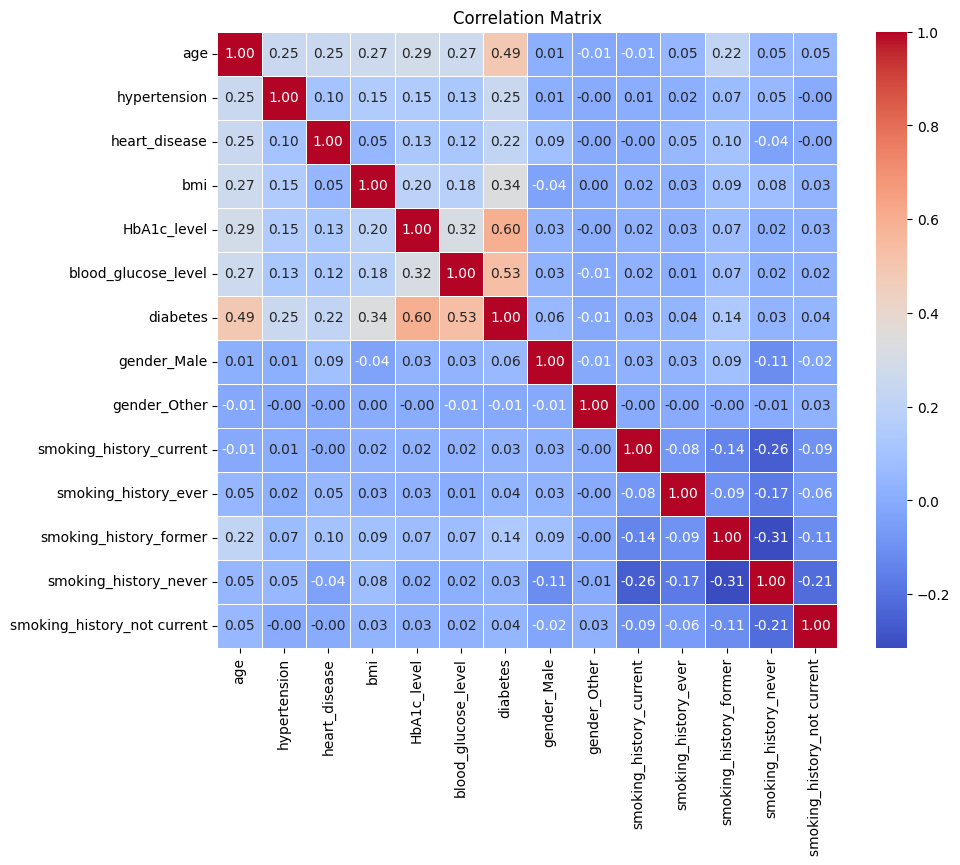

In [19]:
# Run correlation analysis
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Why Perform Correlation Analysis Before Training:

1. **Feature Selection**:  
   Correlation analysis helps identify highly correlated features. If two features are highly correlated (i.e., multicollinearity), it can cause problems in models like linear regression or decision trees because they might "overlap" in terms of information. By removing or combining these features beforehand, you can improve the model's performance and interpretability.

2. **Data Understanding**:  
   Understanding the relationships between features helps in deciding which features are important for your model. It gives insights into the data that can guide feature engineering or preprocessing steps.

3. **Improving Model Efficiency**:  
   Reducing multicollinearity can make your model training more stable, and selecting the most relevant features can improve model performance, especially for algorithms like logistic regression or support vector machines (SVMs).


### Why Low Correlation Is Often Desired:

1. **Avoiding Multicollinearity:**
   - **Multicollinearity** occurs when two or more features are highly correlated with each other. In linear models (like **linear regression**), this can cause problems because the model struggles to distinguish the individual effect of each feature on the target variable. This leads to unstable estimates of coefficients and can make the model's predictions less reliable.
   - For example, if two features, `Height` and `Weight`, are highly correlated, both provide similar information. Including both in the model could inflate variance and lead to overfitting.

2. **Improving Model Interpretability:**
   - When features are highly correlated, it's harder to understand which feature is actually driving the model's predictions. By selecting features that are less correlated, you can more easily interpret the impact of each feature on the outcome.
   - For example, if `Age` and `Years of Experience` are highly correlated, you might want to select one, as both might contribute similar information to the prediction.

3. **Enhancing Model Performance:**
   - Reducing **multicollinearity** can help improve the **accuracy** and **stability** of many machine learning models, such as **logistic regression**, **support vector machines (SVM)**, and others. These models tend to perform better with independent features that provide unique information.
   - For example, **decision trees** and **random forests** can handle correlated features better, but high correlation might still lead to overfitting or redundant information.

4. **Reducing Overfitting:**
   - By eliminating highly correlated features, you reduce the risk of overfitting, where the model memorizes the training data, including noise, instead of generalizing well to new, unseen data.

### How to Handle Correlated Features:

- **Remove one of the correlated features**: If two features are highly correlated (e.g., correlation coefficient > 0.8), you might choose to drop one of them.
- **Feature Engineering**: Combine the correlated features into a new feature that captures the combined information (e.g., averaging the two features or performing dimensionality reduction).
- **Principal Component Analysis (PCA)**: This technique transforms correlated features into a smaller set of uncorrelated features, called principal components, which can help reduce multicollinearity.

### Summary:
- It's generally a good practice to reduce the correlation between features before training, especially when using models sensitive to multicollinearity.
- This leads to better model interpretability, stability, and performance.


### How to Determine if Features Are Highly Correlated

To determine if features are **highly correlated**, you typically calculate the **correlation coefficient** between pairs of features. The correlation coefficient quantifies the strength and direction of the relationship between two variables.

### Steps to Determine High Correlation:

1. **Calculate the Correlation Coefficient:**
   - The most common measure is **Pearson's correlation coefficient** (for continuous variables), which ranges from -1 to 1.
     - **+1**: Perfect positive correlation (as one feature increases, the other increases in exact proportion).
     - **-1**: Perfect negative correlation (as one feature increases, the other decreases in exact proportion).
     - **0**: No correlation.
     - **Between 0.5 and 1 (or -0.5 and -1)**: Strong positive (or negative) correlation.
     - **Between 0.3 and 0.5 (or -0.3 and -0.5)**: Moderate correlation.
     - **Below 0.3**: Weak correlation.

2. **Visualize Correlation:**
   - You can visualize the correlation matrix to easily identify which features are highly correlated with each other.

3. **Check the Correlation Matrix:**
   - A **correlation matrix** is a table showing correlation coefficients between many variables. This can be computed for all pairs of features in your dataset.

In [20]:
# Check class distribution of the target variable 'diabetes'
class_distribution = data['diabetes'].value_counts(normalize=True)
print(class_distribution)

diabetes
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

# Split the data into X (features) and y (target)
X = data.drop(columns=['diabetes']) 
y = data['diabetes']

# Step 1: Split the data into training and test data (80% training, 20% test) with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [29]:
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the splits and the class distribution
print(f"Train shape: {X_train_scaled.shape}")
print(f"Test shape: {X_test_scaled.shape}")
print(f"Class distribution in y_train: \n{y_train.value_counts(normalize=True)}")
print(f"Class distribution in y_test: \n{y_test.value_counts(normalize=True)}")

Train shape: (13571, 13)
Test shape: (3393, 13)
Class distribution in y_train: 
diabetes
1    0.500037
0    0.499963
Name: proportion, dtype: float64
Class distribution in y_test: 
diabetes
0    0.500147
1    0.499853
Name: proportion, dtype: float64


c:\miniconda\envs\ECDC-Neural-Networks-JustinL\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1697
           1       0.88      0.89      0.88      1696

    accuracy                           0.88      3393
   macro avg       0.88      0.88      0.88      3393
weighted avg       0.88      0.88      0.88      3393

--------------------------------------------------


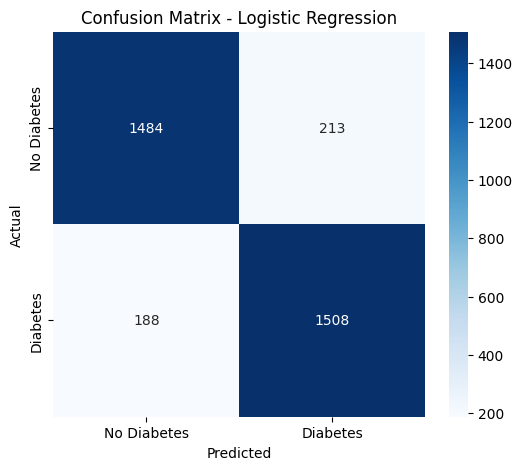

--------------------------------------------------
AUC-ROC for Logistic Regression: 0.96
--------------------------------------------------
Model: SVM
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1697
           1       0.82      0.90      0.86      1696

    accuracy                           0.86      3393
   macro avg       0.86      0.86      0.86      3393
weighted avg       0.86      0.86      0.86      3393

--------------------------------------------------


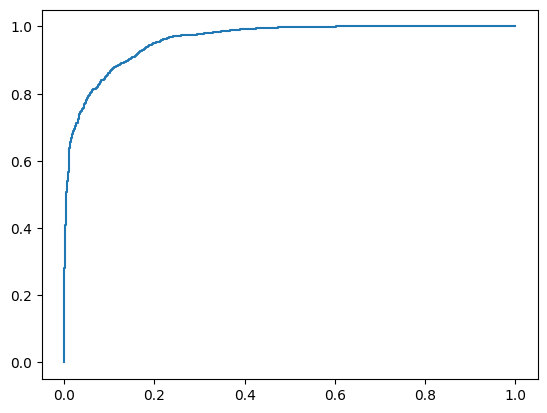

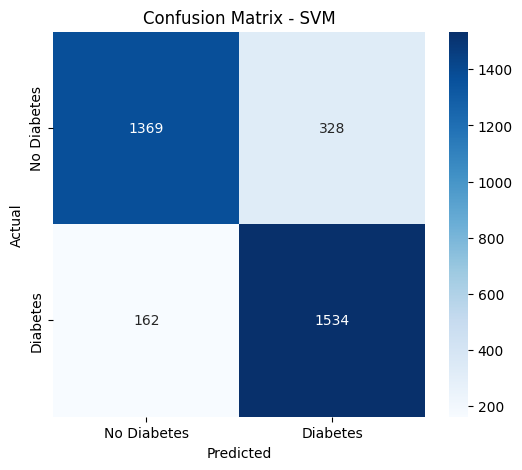

--------------------------------------------------
AUC-ROC for SVM: 0.94
--------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1697
           1       0.88      0.88      0.88      1696

    accuracy                           0.88      3393
   macro avg       0.88      0.88      0.88      3393
weighted avg       0.88      0.88      0.88      3393

--------------------------------------------------


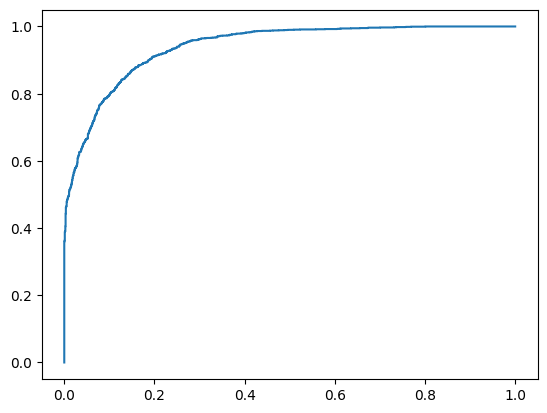

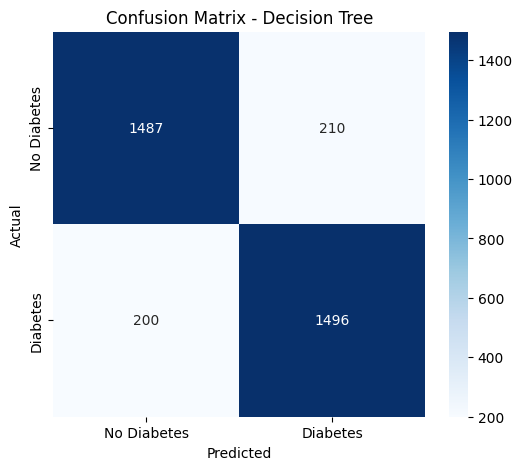

--------------------------------------------------
AUC-ROC for Decision Tree: 0.88
--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1697
           1       0.89      0.92      0.91      1696

    accuracy                           0.90      3393
   macro avg       0.90      0.90      0.90      3393
weighted avg       0.90      0.90      0.90      3393

--------------------------------------------------


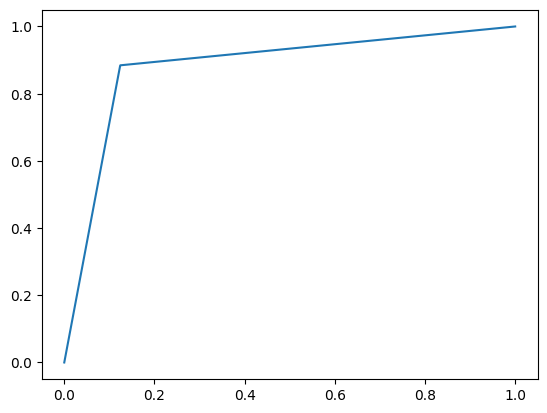

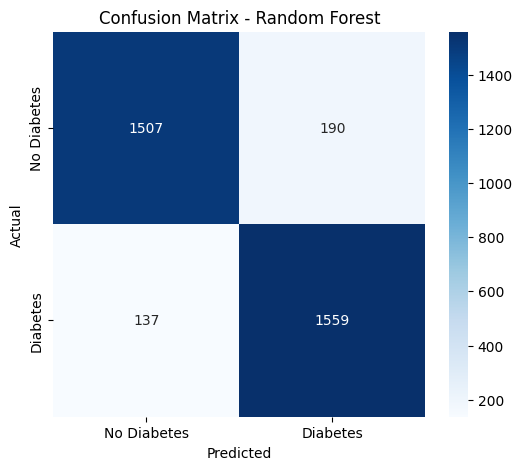

--------------------------------------------------
AUC-ROC for Random Forest: 0.97
--------------------------------------------------
Model: XGBoost
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1697
           1       0.90      0.93      0.91      1696

    accuracy                           0.91      3393
   macro avg       0.91      0.91      0.91      3393
weighted avg       0.91      0.91      0.91      3393

--------------------------------------------------


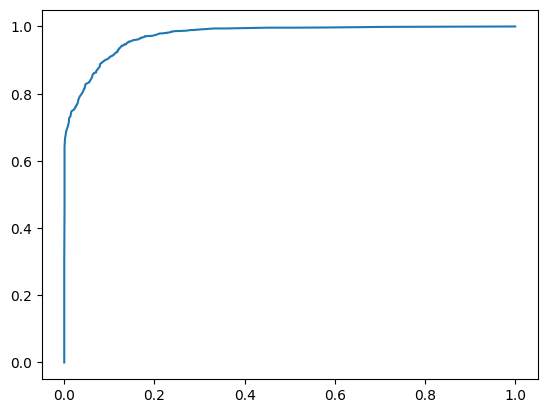

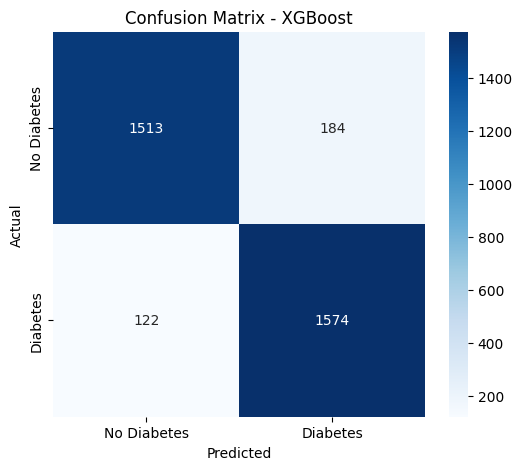

--------------------------------------------------
AUC-ROC for XGBoost: 0.98
--------------------------------------------------


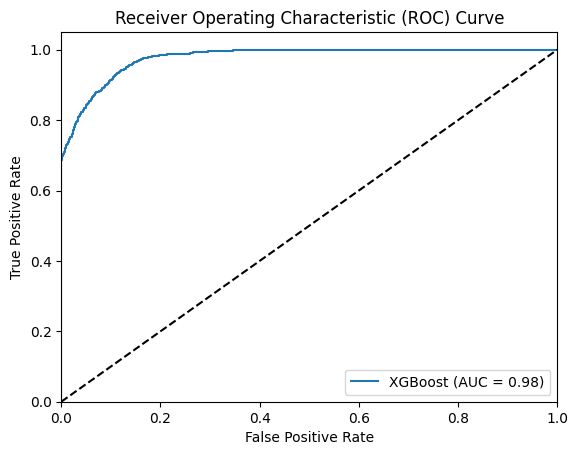

In [30]:
# Define models
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for AUC-ROC
    # Confusion Matrix
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix as heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("-" * 50)

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    print(f'AUC-ROC for {name}: {roc_auc:.2f}')
    print("-" * 50)

# Plot details for all ROC curves
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
from sklearn.model_selection import cross_test_score

for name, model in models.items():
    scores = cross_test_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

c:\miniconda\envs\ECDC-Neural-Networks-JustinL\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\miniconda\envs\ECDC-Neural-Networks-JustinL\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Logistic Regression Cross-Validation Accuracy: 0.88 ± 0.01
SVM Cross-Validation Accuracy: 0.85 ± 0.01
Decision Tree Cross-Validation Accuracy: 0.87 ± 0.01
Random Forest Cross-Validation Accuracy: 0.90 ± 0.00
XGBoost Cross-Validation Accuracy: 0.90 ± 0.00


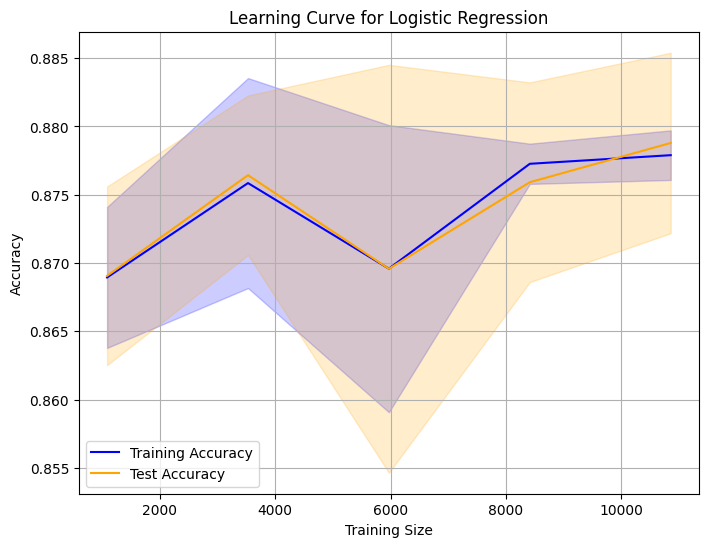

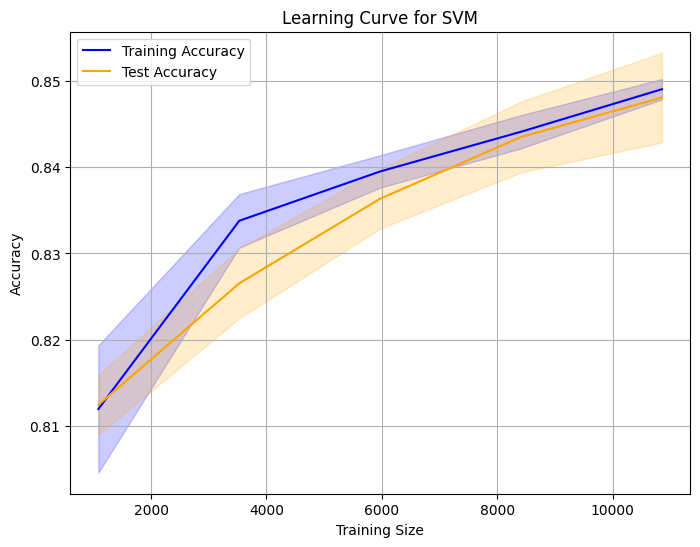

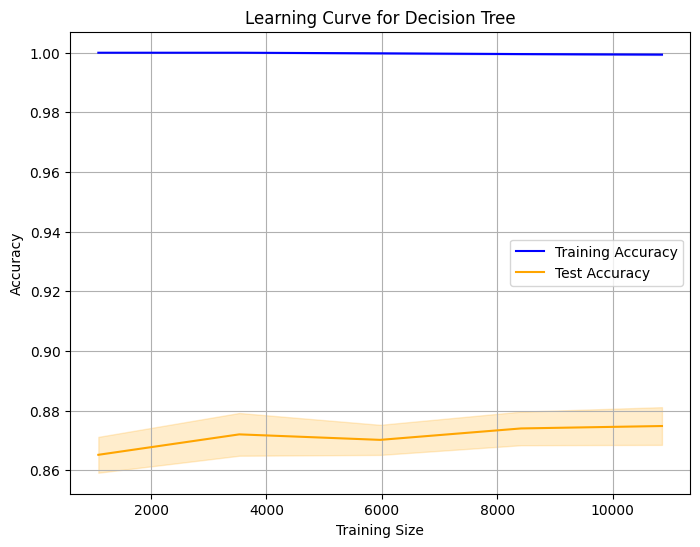

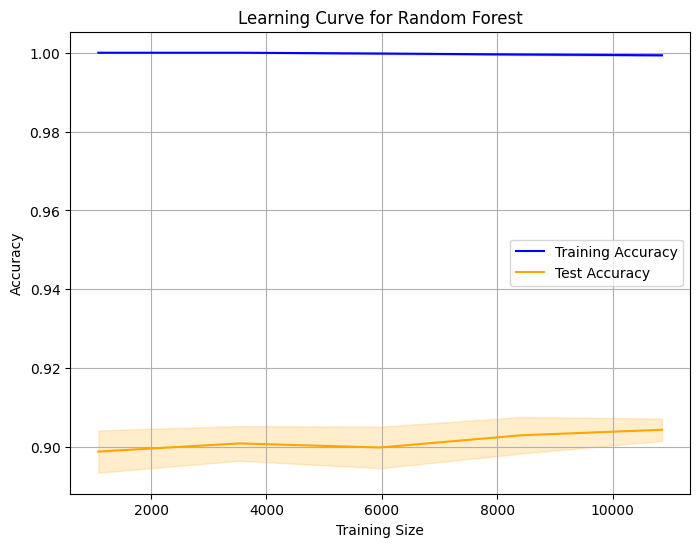

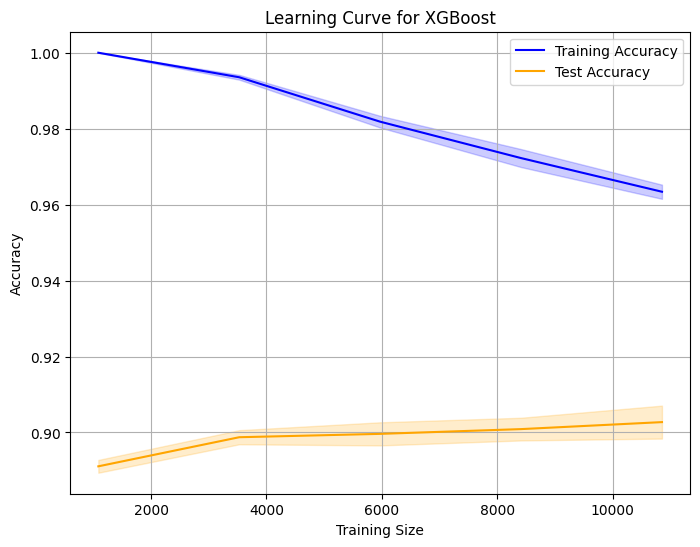

In [32]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Iterate through each model in your models dictionary
for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
    )

    # Calculate mean and standard deviation for training and validation scores
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_mean = test_scores.mean(axis=1)
    test_std = test_scores.std(axis=1)

    # Plot the learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

    plt.plot(train_sizes, test_mean, label='Test Accuracy', color='orange')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')

    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve for {name}')
    plt.legend()
    plt.grid()
    plt.show()


### Overall Conclusion

- **Random Forest** and **XGBoost** are the top performers based on **AUC-ROC** and **cross-validation accuracy**. However, **Random Forest** shows a high **training accuracy** of **100%**, while the **test accuracy** is around **90%**. This significant difference between training and test accuracy, along with the lack of convergence in the learning curve, suggests that **Random Forest** might be **overfitting** to the training data.
  
- **XGBoost**, in contrast, demonstrates a **more balanced** learning curve, with **training and test accuracies** converging as the training size increases, indicating good **generalization**.

- **SVM** performs **well** with **AUC-ROC of 0.94**, but its **cross-validation accuracy** of **0.85 ± 0.01** is lower compared to the tree-based models, suggesting potential for improvement.

- **Decision Tree** and **Logistic Regression** show acceptable performance but fall behind in both **AUC-ROC** and **cross-validation accuracy** compared to the top models.

### Key Insights:

1. **Random Forest** is at risk of **overfitting** due to its perfect **training accuracy** and much lower **test accuracy**. It may be memorizing the training data instead of learning the underlying patterns. Consider adjusting **hyperparameters** (like reducing **max depth**, increasing **min samples split**, or using **early stopping**) to mitigate overfitting.
2. **XGBoost** exhibits **excellent performance** with **balanced learning curves** and **high generalization**, making it the most stable and reliable model.
3. **SVM** shows potential but its **cross-validation score** is lower than the tree-based models, indicating that further optimization could be beneficial.
4. **Decision Tree** and **Logistic Regression** are decent models but are outperformed by the **Random Forest** and **XGBoost** in terms of **AUC-ROC** and **cross-validation accuracy**.

### Recommendations:

1. **Prioritize XGBoost** due to its **high performance**, **balanced learning curve**, and **good generalization**.
2. **Random Forest** may need **hyperparameter tuning** to address the **overfitting** issue, especially through regularization techniques such as adjusting **max depth** or **min samples split**.
3. **SVM** and **Logistic Regression** can be further tuned for better performance, particularly by optimizing **regularization** and **feature selection**.
4. **Cross-validation** results support **XGBoost** and **Random Forest** as the most reliable models, but **Random Forest** should be carefully tuned to avoid overfitting.


### Overall Conclusion

- **Random Forest** and **XGBoost** are the top performers based on **AUC-ROC** and **cross-validation accuracy**. Both models show consistent performance with **cross-validation accuracies** of **0.90 ± 0.00**, indicating **strong generalization** to unseen data.

- **SVM** exhibits **good performance** with **AUC-ROC of 0.94**, but its **cross-validation accuracy** of **0.85 ± 0.01** is lower compared to the tree-based models, suggesting that it may benefit from further optimization to improve its performance and prevent overfitting.

- **Decision Tree** and **Logistic Regression** both perform decently but are **outperformed** by **Random Forest** and **XGBoost** in terms of both **AUC-ROC** and **cross-validation accuracy**. 

### Key Insights:

1. **Random Forest** and **XGBoost** exhibit the **best overall performance**, with both models showing **0.90 ± 0.00** cross-validation accuracy and **high AUC-ROC scores**, indicating they generalize well.
2. **SVM** shows promise but could benefit from additional **optimization** to improve its cross-validation score and reduce **overfitting**.
3. **Decision Tree** shows a **lower AUC-ROC** and **cross-validation accuracy** compared to **Random Forest** and **XGBoost**, suggesting it is less capable of capturing complex patterns in the data.
4. **Logistic Regression** shows a **consistent performance** but **fluctuates** in its learning curve, potentially due to **underfitting** or an inadequate feature set/regularization.

### Recommendations:

1. **Random Forest** and **XGBoost** should be prioritized for production-ready models due to their **high accuracy** and **generalization capabilities**.
2. For **SVM** and **Logistic Regression**, consider adjusting **regularization** or using **feature scaling** to improve consistency and robustness.
3. **Cross-validation** results support that **Random Forest** and **XGBoost** are stable and reliable, confirming the robustness of these models.
